### Defferential Evolution (Sphere Func.)


In [352]:
import numpy as np
import random
from array import *
import matplotlib.pyplot as plt
import statistics as st
import math 

In [353]:
D = 10 # Dimensi dari permasalahan
maxit = 99 #Max iterasi
ukuranPopulasi = 10
LB = -10 #Batas Bawah
UB = 10 #Batas Atas
CR = 0.9 
F = 0.5



In [354]:
import random
def initPopulasi(ukuranPopulasi, D, UB, LB): #Inisialisasi setiap baris kolom
    P = np.empty((ukuranPopulasi,D))
    for i in range(ukuranPopulasi):
        for j in range(D):
            P[i][j]= (random.random()*(UB-LB))+LB
    return P

P = initPopulasi(ukuranPopulasi, D, UB, LB)
print(P)

[[ 5.69622364 -9.77272772 -8.23100607 -6.47651935 -7.01127811  2.86234108
   9.15963831 -8.82896704 -6.82454823 -8.44254531]
 [-8.50629736  6.44187377  2.43136056 -5.28877532  1.70407556  6.15200632
  -0.80228779 -1.23550781 -1.64848515 -0.67735818]
 [ 3.96002675 -2.56211483 -1.17381326  4.28349931 -1.97867226  2.51688329
   7.15746641 -4.11080985  2.21996604 -7.81933746]
 [ 2.66710187  4.31371608 -3.87726489  5.30822543  8.99155279 -2.91639314
   7.78476023  4.32537916  0.38064641  4.77324052]
 [ 4.96449287 -3.61168306  9.56688097  3.48700723  5.9448273   2.48740972
   9.05995896 -1.06552936  6.83874003  8.77041278]
 [-4.85051854 -7.43523641 -6.37721882 -8.45204101  9.24913917 -0.03213903
  -5.86917081 -9.92411394 -6.26045077  9.69013618]
 [-0.34018508  8.72744673 -4.44127703 -8.22533886 -2.42806967  8.74088018
  -3.05250204 -7.61924065  5.51878122  1.66888765]
 [ 0.78397727 -5.63639414 -4.88399924 -3.32307591 -4.88506801  2.59119844
   5.51257767 -1.91504583 -1.91480962  6.93258055]


In [355]:
def funcSphere(populasi):
    ukuran = populasi.shape
    ukuranPopulasi = ukuran[0]
    dimensi = ukuran[1]
    
    Fobj = np.empty(ukuranPopulasi)
    
    for i in range (ukuranPopulasi):
        d = 0
        for j in range (dimensi):
            d = d + populasi[i][j]**2
            # d = d + np.sum(np.abs(populasi[i][j])) + np.product(np.abs(populasi[i][j])) #schwefel 2.22
            # d = d + np.sum(100*(populasi[i][j]+1)-(populasi[i][j]))**2 + (populasi[i][j]-1)**2 #Generalize rosenbrock
            # d =  d + np.sum( (populasi[i][j]**2) - (10*math.cos(2*math.pi*populasi[i][j])) + 10 ) #rastrigins
        Fobj[i] = d
    return Fobj
    
Fobj = funcSphere(P)
print(Fobj)



[574.69961469 193.83500895 186.42066406 260.52550295 389.8097685
 542.49098258 346.57643084 183.64112218 353.01632961 309.97753267]


In [356]:
def crossOver(populasi,F,j):
    ukuran = populasi.shape
    ukuranPopulasi = ukuran[0]
    Dimensi = ukuran[1]
    
    r1 = random.randint(0, ukuranPopulasi-1)
    r2 = random.randint(0, ukuranPopulasi-1)
    r3 = random.randint(0, ukuranPopulasi-1)
    
    while r1 == r2:
        r2 = (r2 + 1)%ukuranPopulasi
        
    while r3 == r1 or r3 == r2:
        r3 = (r3 + 1)%ukuranPopulasi
        
    v = P[r3][j] + F*(P[r1][j] - P[r2][j])
    return v

v = crossOver(P,F,1)
print(v)

0.23808210577046385


In [357]:
P = initPopulasi(ukuranPopulasi, D, UB, LB)
print("Inisialisasi Populasi :\n",P)
print(P)

Fobj = funcSphere(P)
print(Fobj)
print("\nFungsi Objective :\n",Fobj)

U = np.empty((1,D))
bestFobj = np.empty((maxit+1))
bestFobj[0] = Fobj.min()

for it in range(maxit):
    for i in range(ukuranPopulasi):
        for j in range(D):
            U[0][j] = P[i][j]

        jrand=random.randint(0,D)
        
        for j in range(D):
            if random.random() < CR or j == jrand:
                v = crossOver(P,F,j)
                U[0][j] = v
                
        FobjU = funcSphere(U)
        
        if FobjU < Fobj[i]:
            Fobj[i] = FobjU
            for j in range(D):
                P[i][j] = U[0][j]
                
    bestFobj[it+1] = Fobj.min()

    print("\nNilai Optimal : \n",bestFobj)

    for i in range(30):
        bestFobj

Inisialisasi Populasi :
 [[-2.99023387 -2.30335199 -6.28844792  6.36234464  5.79811543  6.98444612
  -3.31980697 -2.52425938  1.58814616  7.8656613 ]
 [ 1.5014591   9.30011846  2.82134302 -0.88325662  4.11976674 -7.97631895
   1.72775567 -9.33612363 -7.77814873  8.83074989]
 [-3.33485689  4.95363847  2.87267108  7.7414543   8.52654202 -5.23624278
  -0.65227729 -1.05187066  6.9625021  -3.1214286 ]
 [-2.40156041  8.84410251 -6.77130035 -1.91413962  0.43212006 -2.09408234
  -5.10293469 -7.75963093 -2.22376393  9.29394292]
 [-9.03837277  4.30791768  9.75134939 -1.18711704  9.28113614  4.83964301
  -1.01718685  6.69774621  7.55075251  5.62775278]
 [ 8.50941964  8.89293536 -0.14059201 -5.24889606 -9.24920816 -0.27267148
  -2.37013569  9.70694158 -5.46388662 -8.64975601]
 [ 9.45526104 -2.36417114  8.44507149 -6.80305401 -1.33488701  4.18467148
  -1.73766953  2.13369988 -5.06618058 -8.93414494]
 [ 3.50117888 -0.83215652 -2.85350024  6.2664531   2.88098252 -6.84959687
  -7.1568322   8.38243173 

In [358]:
import statistics as st
print("Nilai Mean : ",st.mean(bestFobj))
print("Nilai Standard Deviation : ",st.stdev(bestFobj))
print("Nilai Minimal : ",np.min(bestFobj))

Nilai Mean :  39.045273875157235
Nilai Standard Deviation :  65.73583350532162
Nilai Minimal :  0.00294986216248811


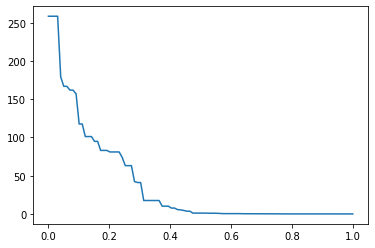

In [359]:
x = np.linspace(0, 1, maxit+1)
plt.plot(x, bestFobj, label= 'f=Fobj')
plt.show()

### Genetic Algorithm

In [360]:
import numpy as np
import random
from array import *
import matplotlib.pyplot as plt
import statistics as st
import math 

In [361]:
N = 3
rows, cols = (N, 4)
induk = [[0 for i in range(cols)] for j in range(rows)]
print (induk)

N_Anak = 6
rows, cols = (N_Anak, 4)
anak = [[0 for i in range(cols)] for j in range(rows)]
print(anak)


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [362]:
#Inisialiasi Parameter
Pc = 0.9
Pm = 0.1

for i in range(N):
    a = random.randint(0, 15)
    induk[i] = [int (x) for x in '{:04b}'.format(a)]
    print(a, induk[i])


15 [1, 1, 1, 1]
0 [0, 0, 0, 0]
6 [0, 1, 1, 0]


In [363]:
#Function cross over
def crossover(ind1=[], ind2=[]):
    anak1 = [0, 0, 0, 0]
    anak2 = [0, 0, 0, 0]
    
    
    anak1[0] = ind1[0]
    anak1[1] = ind1[1]
    anak1[2] = ind2[2]
    anak1[3] = ind2[3]
    
    anak2[0] = ind2[0]
    anak2[1] = ind2[1]
    anak2[2] = ind1[2]
    anak2[3] = ind1[3]
    
    return anak1, anak2


In [364]:
#Function  mutasi
def mutasi(ind=[]):
    ind[1] = 1 - ind[1]
    return ind


In [365]:
#Function hitung Int
def hitungInt(ind = []):
    a = ind[3] * 1
    a = a + ind[2] * 2
    a = a + ind[1] * 4
    a = a + ind[0] * 8
    return a


In [366]:
#Buat function untuk melakukan hitung fitness
def hitungFitness(ind = []):
    a = hitungInt(ind)
    y = a**2 #sphere
    #y = np.sum(np.abs(a)) + np.product(np.abs(a)) #schwefel 2.22
    #y = np.sum(100*(a+1)-(a))**2 + (a-1)**2 #Generalize rosenbrock
    # y = np.sum( (a**2) - (10*math.cos(2*math.pi*a)) + 10 ) #rastrigins

    return y

In [367]:
i = 1
epochs = 99
MaxFitness = [0 for i in range(epochs)] 
angkaFitness = [0 for i in range(epochs)]

#nilai fitness induk
for j in range(N):
    if (hitungFitness(induk[j])>MaxFitness[0]):
        MaxFitness[0] = hitungFitness(induk[j])


In [368]:
#Melakukan perulangan sampai 'epochs' kali
for i in range(30):
  while i < epochs:
    print("Iterasi: ", i+1)   
    #Reproduksi 
    a = random.random()
    if (a<Pc):
        #Cross over
        anak[0], anak[1] = crossover(induk[0], induk[1])
        anak[2], anak[3] = crossover(induk[0], induk[2])
        anak[4], anak[5] = crossover(induk[1], induk[2])
    else:
        #Mutasi
        for j in range(N):
            induk [j] = mutasi(induk[j])
    # ---------------------------------- end reproduksi 
    #Elistism
    minFitness = 10
    idx = 0
    idxanak = 0
    #Cari minFitness (induk terburuk)
    for j in range(len(induk)):
        #print(minFitness, hitungFitness(induk[j]))
        if (hitungFitness(induk[j])<minFitness):
            minFitness = hitungFitness(induk[j])
            idx = j
    
    #cari maxFit (Anak terbaik)
    maxFit = -10
    for j in range(len(anak)):
        if (hitungFitness(anak[j])>maxFit):
            maxFit = hitungFitness(anak[j])
            idxanak = j
    #Bandingkan individual replacement
    if (minFitness < maxFit):
        induk[idx] = anak[idxanak]
    
    #dari populasi induk yang baru mana yang paling baik
    for j in range(N):
        if (hitungFitness(induk[j])>MaxFitness[i]):
            MaxFitness[i] = hitungFitness(induk[j])
    i+=1
    
    print(MaxFitness)

Streaming output truncated to the last 5000 lines.
Iterasi:  36
[225, 225, 225, 225, 225, 225, 225, 225, 196, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 196, 196, 196, 196, 196, 196, 196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Iterasi:  37
[225, 225, 225, 225, 225, 225, 225, 225, 196, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 196, 196, 196, 196, 196, 196, 196, 196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Iterasi:  38
[225, 225, 225, 225, 225, 225, 225, 225, 196, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 196, 196, 196, 196, 19

In [369]:
print("Nilai Mean : ", st.mean(MaxFitness))
print("Nilai Standard Deviation : ", st.stdev(MaxFitness))
print("Nilai Minimal : ",np.min(MaxFitness))

Nilai Mean :  204.2020202020202
Nilai Standard Deviation :  13.127304305382667
Nilai Minimal :  196


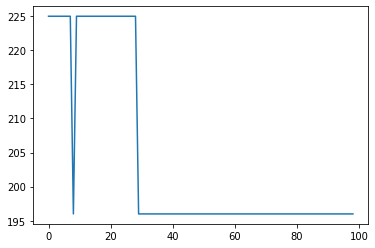

In [370]:
x = [i for i in range(epochs)] 
plt.plot(x, MaxFitness)  